In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from datetime import timedelta
# if using a Jupyter notebook, includue:
%matplotlib inline

import sys

In [2]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Civil', 'Electrical', 'Mechanical', 'Chemical']
sizes = [15, 50, 45, 10]

Text(0.5, 1.0, 'Engineering Courses')

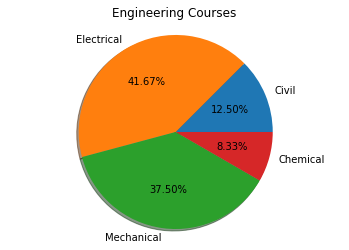

In [21]:
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, shadow=True, autopct='%1.2f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Engineering Courses')

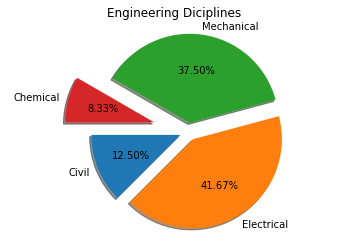

In [17]:
# Explode out the 'Chemical' pie piece by offsetting it a greater amount
explode = (0.1, 0.1, 0.1, 0.4)

fig, ax = plt.subplots()
ax.pie(sizes,
       explode=explode,
       labels=labels,
       autopct='%1.2f%%',
       shadow=True,
       startangle=180)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Engineering Diciplines')


plt.show()

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/Jupyter_Data_Visualization/master/kanjanaphisek_bangkok_pm25.csv')
df.head()

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,62.9,1,0
1,2016,3,3,9,62.9,1,0
2,2016,3,3,10,55.5,1,0
3,2016,3,3,11,55.5,1,0
4,2016,3,3,12,47.9,1,0


In [25]:
df.rename(columns={'UTC Hour':'Hour'}, inplace=True)
df.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,62.9,1,0
1,2016,3,3,9,62.9,1,0
2,2016,3,3,10,55.5,1,0
3,2016,3,3,11,55.5,1,0
4,2016,3,3,12,47.9,1,0


In [26]:
df['datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']]) + pd.Timedelta(hours=7) # UTC to Bangkok time
df.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective,datetime
0,2016,3,3,8,62.9,1,0,2016-03-03 15:00:00
1,2016,3,3,9,62.9,1,0,2016-03-03 16:00:00
2,2016,3,3,10,55.5,1,0,2016-03-03 17:00:00
3,2016,3,3,11,55.5,1,0,2016-03-03 18:00:00
4,2016,3,3,12,47.9,1,0,2016-03-03 19:00:00


In [27]:
df.index = df['datetime']
df.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective,datetime
datetime,,,,,,,,
2016-03-03 15:00:00,2016,3,3,8,62.9,1,0,2016-03-03 15:00:00
2016-03-03 16:00:00,2016,3,3,9,62.9,1,0,2016-03-03 16:00:00
2016-03-03 17:00:00,2016,3,3,10,55.5,1,0,2016-03-03 17:00:00
2016-03-03 18:00:00,2016,3,3,11,55.5,1,0,2016-03-03 18:00:00
2016-03-03 19:00:00,2016,3,3,12,47.9,1,0,2016-03-03 19:00:00


In [28]:
df.Hour = df.index.hour # UTC hour to UTC+7
df.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective,datetime
datetime,,,,,,,,
2016-03-03 15:00:00,2016,3,3,15,62.9,1,0,2016-03-03 15:00:00
2016-03-03 16:00:00,2016,3,3,16,62.9,1,0,2016-03-03 16:00:00
2016-03-03 17:00:00,2016,3,3,17,55.5,1,0,2016-03-03 17:00:00
2016-03-03 18:00:00,2016,3,3,18,55.5,1,0,2016-03-03 18:00:00
2016-03-03 19:00:00,2016,3,3,19,47.9,1,0,2016-03-03 19:00:00


In [29]:
df.drop(columns=['PM10_mask','Retrospective','datetime'],inplace=True)
df.head()

,Year,Month,Day,Hour,PM2.5
datetime,,,,,
2016-03-03 15:00:00,2016,3,3,15,62.9
2016-03-03 16:00:00,2016,3,3,16,62.9
2016-03-03 17:00:00,2016,3,3,17,55.5
2016-03-03 18:00:00,2016,3,3,18,55.5
2016-03-03 19:00:00,2016,3,3,19,47.9


(23814, 5)

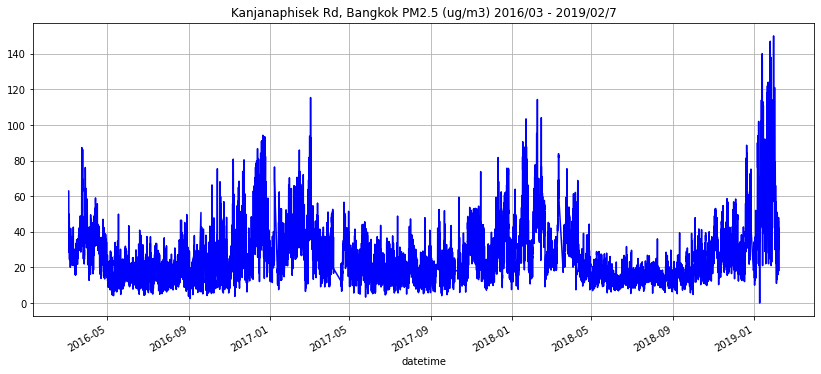

In [32]:
df['PM2.5'].plot(figsize=(14,6),title="Kanjanaphisek Rd, Bangkok PM2.5 (ug/m3) 2016/03 - 2019/02/7", color='blue', grid=True)
df.shape

In [33]:
pv = pd.pivot_table(df, index=df.index.dayofyear, columns=df.index.year,values='PM2.5', aggfunc='mean')
pv

datetime,2016,2017,2018,2019
datetime,,,,
1,NaN,22.187500,21.995652,26.108333
2,NaN,20.433333,26.062500,24.708333
3,NaN,20.837500,32.045833,29.000000
4,NaN,25.137500,35.591667,31.125000
5,NaN,26.462500,41.770833,34.708333
...,...,...,...,...
362,27.770833,21.618182,NaN,NaN
363,33.321739,18.612500,NaN,NaN
364,32.800000,18.825000,NaN,NaN


<AxesSubplot:title={'center':'Bangkok PM2.5 Daily Average Yearly comparison (ug/m3)'}, xlabel='datetime'>

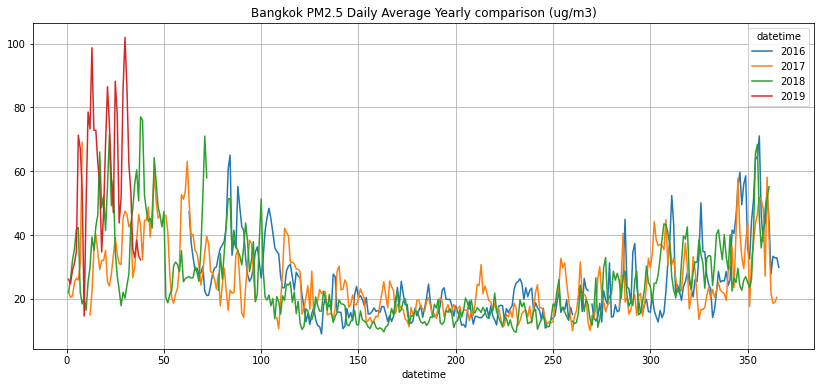

In [34]:
pv.plot(title="Bangkok PM2.5 Daily Average Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

In [35]:
pv2 = pd.pivot_table(df, index=df.index.dayofyear, columns=df.index.year, values='PM2.5', aggfunc='max')
pv

datetime,2016,2017,2018,2019
datetime,,,,
1,NaN,22.187500,21.995652,26.108333
2,NaN,20.433333,26.062500,24.708333
3,NaN,20.837500,32.045833,29.000000
4,NaN,25.137500,35.591667,31.125000
5,NaN,26.462500,41.770833,34.708333
...,...,...,...,...
362,27.770833,21.618182,NaN,NaN
363,33.321739,18.612500,NaN,NaN
364,32.800000,18.825000,NaN,NaN


<AxesSubplot:title={'center':'Bangkok PM2.5 Daily Maximum Yearly comparison (ug/m3)'}, xlabel='datetime'>

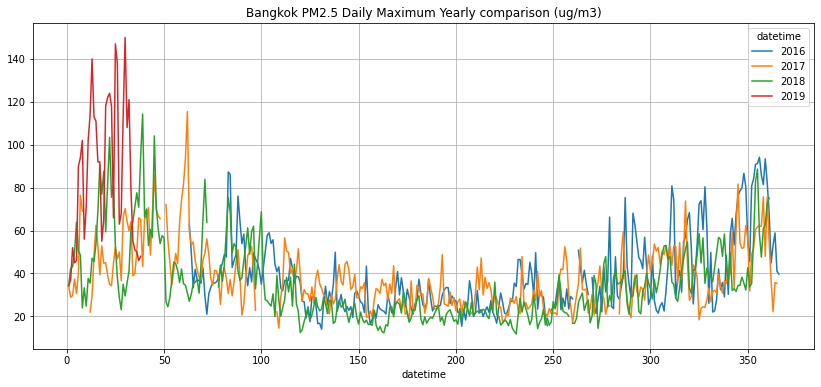

In [36]:
pv2.plot(title="Bangkok PM2.5 Daily Maximum Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

In [57]:
#Heat Map
# Define numbers of generated data points and bins per axis.
N_numbers = 1000000
N_bins = 100

# set random seed 
np.random.seed(0)

# Generate 2D normally distributed numbers.
x, y = np.random.multivariate_normal(
        mean=[0.0, 0.0],      # mean
        cov=[[1.0, 0.4],
             [0.4, 0.25]],    # covariance matrix
        size=N_numbers
        ).T                   # transpose to get columns




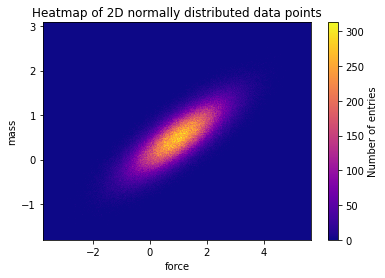

In [52]:
# Construct 2D histogram from data using the 'plasma' colormap
plt.hist2d(x, y, bins=N_bins, cmap='plasma')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of entries')

# Add title and labels to plot.
plt.title('Heatmap of 2D normally distributed data points')
plt.xlabel('force')
plt.ylabel('mass')

# Show the plot.
plt.show()

In [53]:
from mpl_toolkits.mplot3d import Axes3D

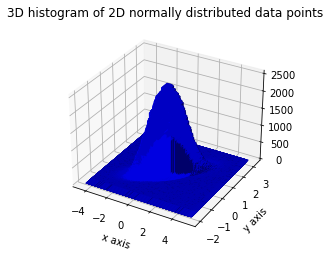

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(x, y, bins=N_bins)

# Add title and labels to plot.
plt.title('3D histogram of 2D normally distributed data points')
plt.xlabel('x axis')
plt.ylabel('y axis')

# Construct arrays for the anchor positions of the bars.
# Note: np.meshgrid gives arrays in (ny, nx) so we use 'F' to flatten xpos,
# ypos in column-major order. For numpy >= 1.7, we could instead call meshgrid
# with indexing='ij'.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

# Construct arrays with the dimensions for the 16 bars.
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

# Show the plot.
plt.show()

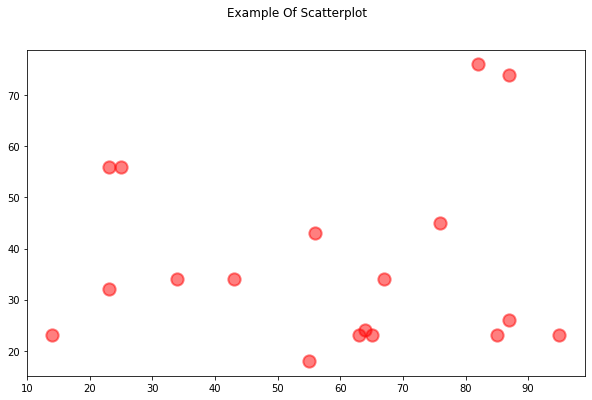

In [75]:
#Scatter Plots

# Data
x = [43,76,34,63,56,82,87,55,64,87,95,23,14,65,67,25,23,85]
y = [34,45,34,23,43,76,26,18,24,74,23,56,23,23,34,56,32,23]

fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('Example Of Scatterplot')

# Create the Scatter Plot
ax.scatter(x, y,
            color="red",    # Color of the dots
            s=150,           # Size of the dots
            alpha=0.5,       # Alpha/transparency of the dots (1 is opaque, 0 is transparent)
            linewidths=2)    # Size of edge around the dots

# Show the plot
plt.show()

In [76]:
#Scatter Plot with labels
# Data
x = [21, 34, 44, 23]
y = [435, 334, 656, 1999]
labels = ["alice", "bob", "charlie", "diane"]

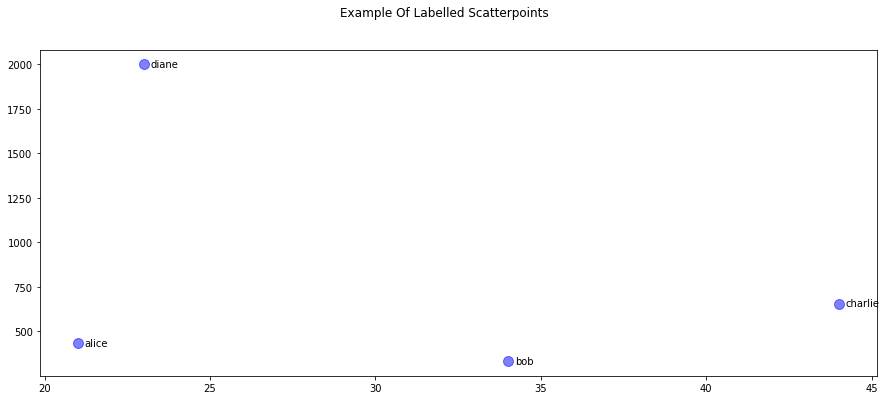

In [81]:
# Create the figure and axes objects
fig, ax = plt.subplots(1, figsize=(15, 6))
fig.suptitle('Example Of Labelled Scatterpoints')

# Plot the scatter points
ax.scatter(x, y,
           color="blue",  # Color of the dots
           s=100,         # Size of the dots
           alpha=0.5,     # Alpha of the dots
           linewidths=1)  # Size of edge around the dots

# Add the participant names as text labels for each point
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered

# Show the plot
plt.show()


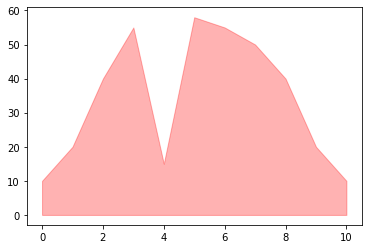

In [86]:
#Shaded Plot
# Data
x =  [0,1,2,3,4,5,6,7,8,9,10]
y1 = [10,20,40,55,15,58,55,50,40,20,10]

# Shade the area between y1 and line y=0
plt.fill_between(x, y1, 0,
                 facecolor="orange", # The fill color
                 color='red',       # The outline color
                 alpha=0.3)          # Transparency of the fill

# Show the plot
plt.show()

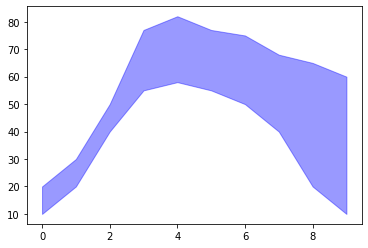

In [90]:
#Shaded Plot between two lines
# Data
x =  [0,1,2,3,4,5,6,7,8,9]
y1 = [10,20,40,55,58,55,50,40,20,10]
y2 = [20,30,50,77,82,77,75,68,65,60]

# Shade the area between y1 and y2
plt.fill_between(x, y1, y2,
                 facecolor="orange", # The fill color
                 color='blue',       # The outline color
                 alpha=0.4)          # Transparency of the fill

# Show the plot
plt.show()

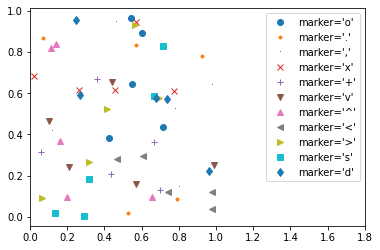

In [91]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

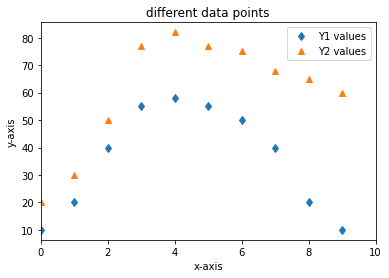

In [108]:
x =  [0,1,2,3,4,5,6,7,8,9]
y1 = [10,20,40,55,58,55,50,40,20,10]
y2 = [20,30,50,77,82,77,75,68,65,60]
marker='d'
plt.plot(x, y1, marker,label="Y1 values")
marker='^'
plt.plot(x, y2, marker,label="Y2 values")
plt.legend(numpoints=1)
plt.legend(numpoints=1)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('different data points')
plt.xlim(0, 10);

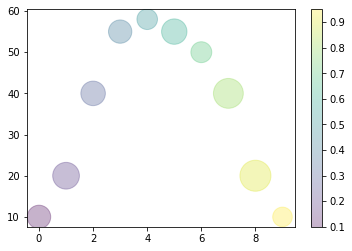

In [117]:
rng = np.random.RandomState(0)
#x = rng.randn(100)
#y = rng.randn(100)
#colors = rng.rand(10)
sizes = 1000 * rng.rand(10)
x =  [0,1,2,3,4,5,6,7,8,9]
y = [10,20,40,55,58,55,50,40,20,10]
colors=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95]
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

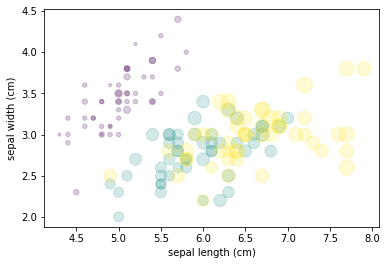

In [118]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);